In [1]:
#### IMPORT Everything here ####
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests


In [2]:
#### Read 'movies_metadata.csv' and display it as a DataFrame ####
movie_metadata_path = "Resources/movies_metadata.csv"
movie_metadata = pd.read_csv(movie_metadata_path, low_memory = False)

#### Here's the first 10 rows of the raw and unfiltered DataFrame ####
movie_metadata.head(10)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [3]:
#### Get rid of unnecessary columns like 'original_language', 'homepage', etc. ####
movie_metadata_df =  movie_metadata[["title", "imdb_id", "genres", "release_date", "budget", "revenue", "runtime", "vote_average", "vote_count", "production_companies"]]

#### We only want movies between 2007 and 2017. ####
movie_metadata_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :]

#### The data was EXTREMELY messy for certain movies, so we only looked at movies 
# that had a budget and box office of more than $100,000. ####
movie_metadata_df = movie_metadata_df.loc[ (movie_metadata_df["budget"] >= "100000") & (movie_metadata_df["revenue"] >= 100000.0), :]




#### We won't index this DataFrame by the movie title (yet). 
# If we did right now, here's what it would look like. ####
#movie_metadata_df.set_index("title") 





#?#?# This CSV made the data type of budget and runtime into strings, so yay. #?#?#?#
                                        #### (•_•) ####
#### Convert all wanted numerical values, except release_date, into float ####
movie_metadata_df["budget"] = movie_metadata_df["budget"].astype(float)
movie_metadata_df["revenue"] = movie_metadata_df["revenue"].astype(float)
movie_metadata_df["runtime"] = movie_metadata_df["runtime"].astype(float)

#### First 10 in our DataFrame ####
movie_metadata_df.head(10)


,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies
4356,Camille Claudel 1915,tt2018086,"[{'id': 18, 'name': 'Drama'}]",2013-03-13,3512454.0,115860.0,95.0,7.0,20.0,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art..."
11155,Black Gold,tt1701210,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2011-12-21,40000000.0,5446000.0,130.0,5.9,77.0,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name..."
11472,Freedom Writers,tt0463998,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2007-01-05,21000000.0,41170784.0,123.0,7.6,368.0,"[{'name': 'Double Feature Films', 'id': 215}, ..."
11497,Code Name: The Cleaner,tt0462229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2007-01-05,20000000.0,10337477.0,84.0,4.7,78.0,"[{'name': 'New Line Cinema', 'id': 12}]"
11498,Stomp the Yard,tt0775539,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",2007-05-16,13000000.0,75511123.0,114.0,6.1,90.0,"[{'name': 'Rainforest Films', 'id': 1309}]"
11521,The Hitcher,tt0455960,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2007-01-19,10000000.0,25399945.0,84.0,5.6,253.0,"[{'name': 'Intrepid Pictures', 'id': 1224}, {'..."
11537,Bridge to Terabithia,tt0398808,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2007-02-16,60000000.0,137587063.0,96.0,7.0,1146.0,"[{'name': 'Walden Media', 'id': 10221}, {'name..."
11547,Waitress,tt0473308,"[{'id': 35, 'name': 'Comedy'}]",2007-05-25,2000000.0,22179430.0,108.0,6.6,132.0,"[{'name': 'Night and Day Pictures', 'id': 24133}]"
11557,Epic Movie,tt0799949,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2007-01-25,20000000.0,86865564.0,86.0,3.2,334.0,[{'name': 'Twentieth Century Fox Film Corporat...
11558,The Messengers,tt0425430,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",2007-02-02,16000000.0,1109660.0,90.0,5.6,216.0,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."


In [4]:
#### How many Movies are we looking at? ####
print(f"The movie database contains {len(movie_metadata_df)} movies that match our criteria.")


The movie database contains 2148 movies that match our criteria.


In [5]:

#### Just for fun, let's separate movies by release year. ####
### Note that the roman numerals denote the 'yy' year of data. ###

moviesVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2007-12-31"), :]
moviesVIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2008-01-01") & (movie_metadata_df["release_date"] <= "2008-12-31"), :]
moviesIX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2009-01-01") & (movie_metadata_df["release_date"] <= "2009-12-31"), :]
moviesX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2010-01-01") & (movie_metadata_df["release_date"] <= "2010-12-31"), :]
moviesXI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2011-01-01") & (movie_metadata_df["release_date"] <= "2011-12-31"), :]
moviesXII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2012-01-01") & (movie_metadata_df["release_date"] <= "2012-12-31"), :]
moviesXIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2013-01-01") & (movie_metadata_df["release_date"] <= "2013-12-31"), :]
moviesXIV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2014-01-01") & (movie_metadata_df["release_date"] <= "2014-12-31"), :]
moviesXV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2015-01-01") & (movie_metadata_df["release_date"] <= "2015-12-31"), :]
moviesXVI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2016-01-01") & (movie_metadata_df["release_date"] <= "2016-12-31"), :]
moviesXVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2017-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :]




In [6]:
#### Here's how many movies this csv catalogues per year, from 2007 to 2017 ####
movieYearList = [len(moviesVII_df["imdb_id"]), len(moviesVIII_df["imdb_id"]), len(moviesIX_df["imdb_id"]), len(moviesX_df["imdb_id"]), len(moviesXI_df["imdb_id"]), len(moviesXII_df["imdb_id"]), len(moviesXIII_df["imdb_id"]), len(moviesXIV_df["imdb_id"]), len(moviesXV_df["imdb_id"]), len(moviesXVI_df["imdb_id"]), len(moviesXVII_df["imdb_id"]) ]
movieYearList

[186, 202, 203, 223, 226, 191, 214, 200, 205, 228, 70]

<Axes: xlabel='budget', ylabel='revenue'>

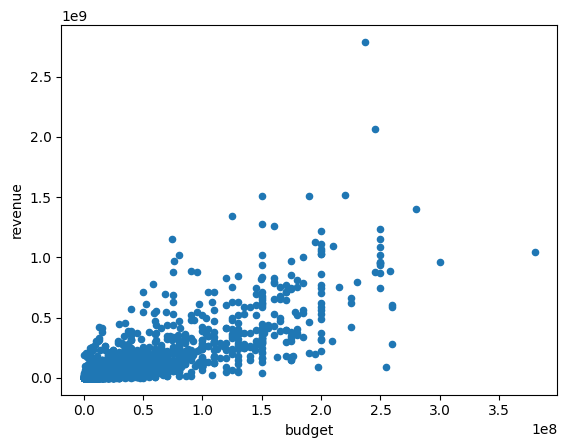

In [13]:
#### Is a movie's budget at all related to how much money it makes (its revenue)? ####

#### Graph movie revenue vs budget using a scatterplot. ####

movie_metadata_df.plot.scatter("budget","revenue")


In [16]:
#### Find the Pearson Correlation Coefficient (r) ####

bud_revCORR = np.corrcoef(movie_metadata_df["budget"], movie_metadata_df["revenue"])

print(f"Between movie budget and movie revenue, the correlation coefficient is {round(bud_revCORR[0, 1], 5)}.")


Between movie budget and movie revenue, the correlation coefficient is 0.78102.


In [19]:
budMean = movie_metadata_df["budget"].mean()
budVar = movie_metadata_df["budget"].var()
budSTDEV = movie_metadata_df["budget"].std()

revMean = movie_metadata_df["revenue"].mean()
revVar = movie_metadata_df["revenue"].var()
revSTDEV = movie_metadata_df["revenue"].std()

runMean = movie_metadata_df["runtime"].mean()
runVar = movie_metadata_df["runtime"].var()
runSTDEV = movie_metadata_df["runtime"].std()


In [21]:
print(f"Budget Mean: ${round(budMean, 2)},\nBudget Variance: {budVar},\nBudget Standard Deviation: ${round(budSTDEV, 2)}")



Budget Mean: $40025179.74,
Budget Variance: 2511118761153653.0,
Budget Standard Deviation: $50111064.26


In [22]:
print(f"Revenue Mean: ${round(revMean, 2)},\nRevenue Variance: {revVar},\nRevenue Standard Deviation: ${round(revSTDEV, 2)}")



Revenue Mean: $119844340.2,
Revenue Variance: 4.501143323189912e+16,
Revenue Standard Deviation: $212158981.03


In [33]:
st.skew(movie_metadata_df["budget"])

2.1696464016173973

In [34]:
st.skew(movie_metadata_df["revenue"])

3.897173441484191

In [35]:
st.kurtosis(movie_metadata_df["budget"])

5.058540787179089

In [36]:
st.kurtosis(movie_metadata_df["revenue"])

23.56038434106482